In [228]:
import pandas as pd
import numpy as np

In [229]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import NullLocator
from matplotlib.ticker import LinearLocator

In [230]:
payments = pd.read_csv("/content/drive/MyDrive/some_data/A17_payments.csv") #, index_col=0)

In [231]:
payments

,birth,start,jan_mar,apr_jun,jul_sep,oct_dec
Анисимов,23/09/1972,14/03/2004,2115,2300,3150,3625
Богословский,15/11/1969,05/08/2003,2575,2365,2480,1825
Гуреев,06/09/1963,29/12/2000,3060,2370,1825,1670
Кузьмин,05/04/1964,02/12/2003,2010,1945,2385,2010
Лобов,02/05/1967,24/11/2002,3010,2590,2425,1360
Михайлюк,25/06/1968,06/07/2003,3185,1290,2670,3120
Прошкин,11/08/1971,10/05/1998,2940,2745,3090,2850
Русаков,04/02/1976,23/04/2001,1215,2140,2375,1490
Хаматов,28/12/1974,03/01/1999,1945,2655,3790,1875
Яковлев,29/05/1970,16/09/2002,2170,2940,3710,2075


In [232]:
payments.dtypes

birth      object
start      object
jan_mar     int64
apr_jun     int64
jul_sep     int64
oct_dec     int64
dtype: object

In [233]:
payments["birth"] = pd.to_datetime(payments["birth"], dayfirst=True)
payments["start"] = pd.to_datetime(payments["start"], dayfirst=True)

In [234]:
payments.dtypes

birth      datetime64[ns]
start      datetime64[ns]
jan_mar             int64
apr_jun             int64
jul_sep             int64
oct_dec             int64
dtype: object

In [235]:
payments.iloc[2]

birth      1963-09-06 00:00:00
start      2000-12-29 00:00:00
jan_mar                   3060
apr_jun                   2370
jul_sep                   1825
oct_dec                   1670
Name: Гуреев, dtype: object

In [236]:
payments_dollars = payments.drop(["birth", "start"], axis=1)

In [237]:
payments_dollars

,jan_mar,apr_jun,jul_sep,oct_dec
Анисимов,2115,2300,3150,3625
Богословский,2575,2365,2480,1825
Гуреев,3060,2370,1825,1670
Кузьмин,2010,1945,2385,2010
Лобов,3010,2590,2425,1360
Михайлюк,3185,1290,2670,3120
Прошкин,2940,2745,3090,2850
Русаков,1215,2140,2375,1490
Хаматов,1945,2655,3790,1875
Яковлев,2170,2940,3710,2075


In [238]:
gureev = payments_dollars.loc["Гуреев", ["jul_sep", "oct_dec"]]

In [239]:
gureev

jul_sep    1825
oct_dec    1670
Name: Гуреев, dtype: int64

Ответ на 1-е задание:

In [240]:
list(payments_dollars.index)

['Анисимов',
 'Богословский',
 'Гуреев',
 'Кузьмин',
 'Лобов',
 'Михайлюк',
 'Прошкин',
 'Русаков',
 'Хаматов',
 'Яковлев']

In [241]:
age_dates = payments.drop(["jan_mar", "apr_jun", "jul_sep", "oct_dec"], axis=1)

In [242]:
age_dates

,birth,start
Анисимов,1972-09-23,2004-03-14
Богословский,1969-11-15,2003-08-05
Гуреев,1963-09-06,2000-12-29
Кузьмин,1964-04-05,2003-12-02
Лобов,1967-05-02,2002-11-24
Михайлюк,1968-06-25,2003-07-06
Прошкин,1971-08-11,1998-05-10
Русаков,1976-02-04,2001-04-23
Хаматов,1974-12-28,1999-01-03
Яковлев,1970-05-29,2002-09-16


In [243]:
age_dates["age_from"] = age_dates["start"] - age_dates["birth"]

In [244]:
age_dates

,birth,start,age_from
Анисимов,1972-09-23,2004-03-14,11495 days
Богословский,1969-11-15,2003-08-05,12316 days
Гуреев,1963-09-06,2000-12-29,13629 days
Кузьмин,1964-04-05,2003-12-02,14485 days
Лобов,1967-05-02,2002-11-24,12990 days
Михайлюк,1968-06-25,2003-07-06,12794 days
Прошкин,1971-08-11,1998-05-10,9769 days
Русаков,1976-02-04,2001-04-23,9210 days
Хаматов,1974-12-28,1999-01-03,8772 days
Яковлев,1970-05-29,2002-09-16,11798 days


In [245]:
# totalDays = 8772   

# years = totalDays//365.25
# months = (totalDays%365)//30
# days = (totalDays%365)%30

# print(years,months,days)

In [246]:
start_age = age_dates.drop(["birth", "start"], axis=1)
start_age

,age_from
Анисимов,11495 days
Богословский,12316 days
Гуреев,13629 days
Кузьмин,14485 days
Лобов,12990 days
Михайлюк,12794 days
Прошкин,9769 days
Русаков,9210 days
Хаматов,8772 days
Яковлев,11798 days


In [247]:
list(start_age["age_from"].dt.days)

[11495, 12316, 13629, 14485, 12990, 12794, 9769, 9210, 8772, 11798]

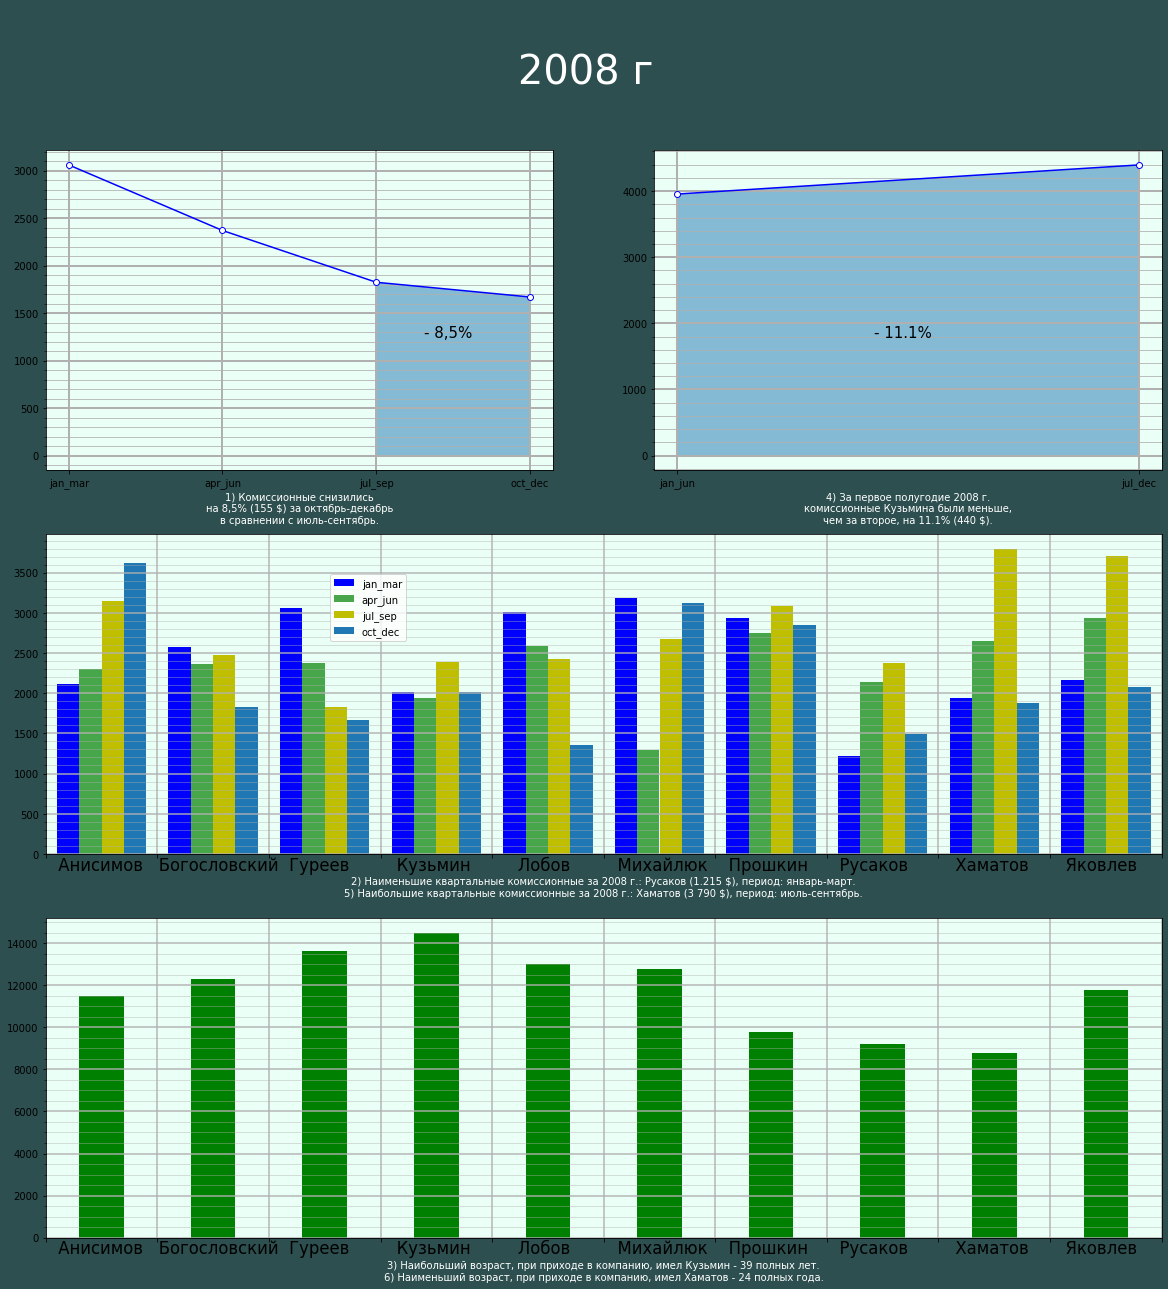

In [262]:
fig = plt.figure(figsize=(20, 20), facecolor=(.18, .31, .31))
gs = GridSpec(ncols=2, nrows=3, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.set_xlabel("1) Комиссионные снизились\nна 8,5% (155 $) за октябрь-декабрь\nв сравнении с июль-сентябрь.", color='w')
plt.figtext(0.388, 0.75, "- 8,5%", fontsize=15)
x = np.array(["jan_mar", "apr_jun", "jul_sep", "oct_dec"])
y = np.array([3060, 2370, 1825, 1670])
x1 = np.array(["jul_sep", "oct_dec"])
y1 = np.array([1825, 1670])
ax.set_facecolor('#eafff5')
ax.plot(x, y, "-ob", markerfacecolor="w")
ax.fill_between(x1, y1, alpha=0.5)
ax.minorticks_on()
ax.grid(which="major", lw = 2)
ax.grid(which="minor")
ax.xaxis.set_minor_locator(NullLocator())

################################################################################
ax3 = fig.add_subplot(gs[0, 1])
ax3.set_xlabel("4) За первое полугодие 2008 г.\nкомиссионные Кузьмина были меньше,\nчем за второе, на 11.1% (440 $).", color='w')
plt.figtext(0.7, 0.75, "- 11.1%", fontsize=15)
x = np.array(["jan_jun", "jul_dec"])
y = np.array([3955, 4395])
ax3.set_facecolor('#eafff5')
ax3.plot(x, y, "-ob", markerfacecolor="w")
ax3.fill_between(x, y, alpha=0.5)
ax3.minorticks_on()
ax3.grid(which="major", lw = 2)
ax3.grid(which="minor")
ax3.xaxis.set_minor_locator(NullLocator())


################################################################################
ax0 = fig.add_subplot(gs[1, 0:2])
#fig0.suptitle("2008 г", color='w')
ax0.set_xlim(-0.3, 9.7)
ax0.xaxis.set_major_locator(LinearLocator())
# ax0.set_xticklabels(list(payments_dollars.index))
ax0.set_xticklabels([])
ax0.set_facecolor('#eafff5')
x = np.arange(10)
y1 =list(payments_dollars["jan_mar"])
y2 =list(payments_dollars["apr_jun"])
y3 =list(payments_dollars["jul_sep"])
y4 =list(payments_dollars["oct_dec"])
w = 0.2
ax0.bar(x - w/2, y1, width=w, color="b")
ax0.bar(x + w/2, y2, width=w, color="g", alpha=0.7)
ax0.bar(x + w*1.5, y3, width=w, color="y")
ax0.bar(x + w*2.5, y4, width=w)
ax0.minorticks_on()
ax0.grid(which="major", lw = 2, alpha=0.7)
ax0.grid(which="minor", alpha=0.5)
ax0.xaxis.set_minor_locator(NullLocator())
plt.figtext(0.13, 0.38, " Анисимов   Богословский  Гуреев         Кузьмин         \
Лобов         Михайлюк    Прошкин      Русаков         Хаматов       Яковлев", fontsize=16.5)
# ax0.legend(["jan_mar"], )
ax0.legend(["jan_mar", "apr_jun", "jul_sep", "oct_dec"], bbox_to_anchor=(0.25, 0.65))
ax0.set_xlabel("\n2) Наименьшие квартальные комиссионные за 2008 г.: Русаков (1.215 $), период: январь-март.\
\n5) Наибольшие квартальные комиссионные за 2008 г.: Хаматов (3 790 $), период: июль-сентябрь.", color='w')

################################################################################
ax2 = fig.add_subplot(gs[2, 0:2])
fig.suptitle("\n2008 г", color='w', fontsize=40)
ax2.set_xlim(-0.3, 9.7)
ax2.xaxis.set_major_locator(LinearLocator())
# ax2.set_xticklabels(list(payments_dollars.index))
ax2.set_xticklabels([])
ax2.set_facecolor('#eafff5')
x = np.arange(10)
y1 = list(start_age["age_from"].dt.days)

w = 0.4
ax2.bar(x + w/2, y1, width=w, color="g")

ax2.minorticks_on()
ax2.grid(which="major", lw = 2, alpha=0.7)
ax2.grid(which="minor", alpha=0.5)
ax2.xaxis.set_minor_locator(NullLocator())
plt.figtext(0.13, 0.114, " Анисимов   Богословский  Гуреев         Кузьмин         \
Лобов         Михайлюк    Прошкин      Русаков         Хаматов       Яковлев", fontsize=16.5)
ax2.set_xlabel("\n3) Наибольший возраст, при приходе в компанию, имел Кузьмин - 39 полных лет.\
\n6) Наименьший возраст, при приходе в компанию, имел Хаматов - 24 полных года.", color='w')

plt.show(fig)